
# 🥊 Projeto: Análise de Dados sobre Boxe

Projeto sobre uma das minhas paixões — o **boxe**.  
Um conjunto de dados com informações interessantes sobre lutadores e como é possível **extrair ideias e padrões a partir dos dados**.  
Aqui, combino **estudo, trabalho e hobby**, mostrando como os dados estão em tudo, até no esporte.


Primeiros passos, lendo o arquivo, importando **pandas** e transformando em **dataframe**

In [5]:
import pandas as pd 
boxe = pd.read_csv('fighters.csv')
boxe.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


Já percebo algumas colunas interessantes pra algumas análises, A postura (ortodoxa vs. canhoto) influencia na taxa de nocaute? qual a média de idade dos lutadores? influencia mais numa luta a experiencia do mais velho ou a vitalidade da juventude?


In [6]:
boxe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2760 non-null   object
 1   wins     2760 non-null   int64 
 2   looses   2760 non-null   int64 
 3   draws    2760 non-null   int64 
 4   ko_rate  2760 non-null   object
 5   stance   2760 non-null   object
 6   age      2760 non-null   object
 7   height   2760 non-null   object
 8   reach    2760 non-null   object
 9   country  2760 non-null   object
dtypes: int64(3), object(7)
memory usage: 215.8+ KB


muitos valores com **unknown** sem informação, tipos de dados estão incorretos, a maioria como objeto, próximo passo e **renomear** colunas pro meu idioma, **limpar e converter**

In [7]:
boxe = boxe.rename(columns={
    'name': 'nome',
    'wins': 'vitorias',
    'looses': 'derrotas',
    'draws' : 'empates',
    'ko_rate': 'taxa_ko',
    'stance' : 'postura',
    'age' : 'idade',
    'height': 'altura',
    'reach': 'alcance',
    'country': 'pais'
})

# Limpeza e conversão de tipos
boxe['taxa_ko'] = boxe['taxa_ko'].str.replace('%', '', regex=False)
boxe['taxa_ko'] = pd.to_numeric(boxe['taxa_ko'], errors='coerce')

boxe['idade'] = pd.to_numeric(boxe['idade'], errors='coerce')

boxe['altura'] = boxe['altura'].str.replace('cm', '', regex=False)
boxe['altura'] = pd.to_numeric(boxe['altura'], errors='coerce')

boxe['alcance'] = boxe['alcance'].str.replace('cm', '', regex=False)
boxe['alcance'] = pd.to_numeric(boxe['alcance'], errors='coerce')

boxe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nome      2760 non-null   object 
 1   vitorias  2760 non-null   int64  
 2   derrotas  2760 non-null   int64  
 3   empates   2760 non-null   int64  
 4   taxa_ko   2760 non-null   float64
 5   postura   2760 non-null   object 
 6   idade     1805 non-null   float64
 7   altura    0 non-null      float64
 8   alcance   0 non-null      float64
 9   pais      2760 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 215.8+ KB


Nesses casos, altura e alcance não são essenciais, especialmente se a maioria dos valores está ausente.
Então, não vale o esforço de fazer toda a limpeza, regex e conversão só pra ter meia dúzia de valores válidos.
— limpando o que não serve, temos alguns valores da idade em nulos, que vou tirar também 

In [8]:
boxe_limpo = boxe.copy()
boxe_limpo = boxe_limpo.drop(columns=['altura', 'alcance'])
boxe_limpo = boxe_limpo.dropna(subset=['idade'])
boxe_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1805 entries, 3 to 2759
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nome      1805 non-null   object 
 1   vitorias  1805 non-null   int64  
 2   derrotas  1805 non-null   int64  
 3   empates   1805 non-null   int64  
 4   taxa_ko   1805 non-null   float64
 5   postura   1805 non-null   object 
 6   idade     1805 non-null   float64
 7   pais      1805 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 126.9+ KB


## 📌 Visão Geral do Dataset

Após a limpeza dos dados e remoção das entradas com idade desconhecida, o conjunto final conta com **1.805 lutadores** de diversos países.

Podemos observar informações como número de vitórias, derrotas, empates, postura (stance), taxa de nocaute e país de origem. A partir disso, conseguimos extrair padrões importantes sobre o perfil dos atletas e características do boxe profissional.


In [19]:
print("📊 Estatísticas gerais numéricas:")
display(boxe_limpo.describe())

print("\n🥊 Postura mais comum:")
print(boxe_limpo['postura'].value_counts())

print("\n🌍 Países com mais lutadores (Top 10):")
print(boxe_limpo['pais'].value_counts().head(10))


📊 Estatísticas gerais numéricas:


,vitorias,derrotas,empates,taxa_ko,idade
count,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000
mean,29.046537,6.319114,1.379501,37.978006,48.821053
std,32.572587,11.654063,3.449593,26.839097,26.625338
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,12.900000,30.000000
50%,22.000000,3.000000,0.000000,41.500000,37.000000
75%,38.000000,8.000000,1.000000,58.900000,59.000000
max,262.000000,190.000000,60.000000,100.000000,221.000000



🥊 Postura mais comum:
postura
Orthodox    1525
Southpaw     178
Unknown      102
Name: count, dtype: int64

🌍 Países com mais lutadores (Top 10):
pais
United States         602
United Kingdom        191
Argentina             150
Mexico                 99
Japan                  62
Russian Federation     42
France                 41
Germany                39
Canada                 36
Puerto Rico            31
Name: count, dtype: int64


## 🎯 Análise da Idade dos Lutadores

A idade média observada foi de aproximadamente **47 anos**, porém a média pode ser influenciada por valores muito altos.  
Por isso, a métrica mais representativa neste caso é a **mediana**, que ficou em **37 anos**.

🔥 **Conclusão:**  
A maior parte dos lutadores tem entre **30 e 40 anos**, idade típica de atletas em alto nível. A média elevada indica que alguns registros incluem lutadores mais velhos ou já inativos.


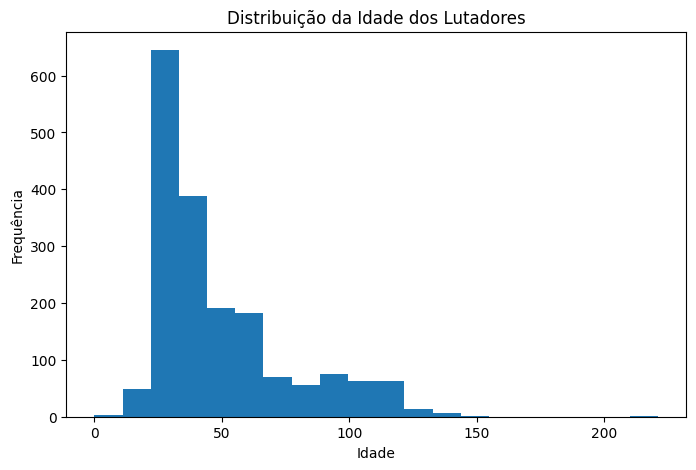

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(boxe_limpo['idade'], bins=20)
plt.title("Distribuição da Idade dos Lutadores")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()


## 🥊 Taxa de Nocaute (KO Rate)

A taxa média de nocaute entre os lutadores é de aproximadamente **37%**.  
Isso indica que o nocaute é importante no boxe, mas não é o único fator determinante — boa parte das vitórias é decidida por pontos.

Podemos explorar mais tarde se postura, idade ou país influenciam esse valor.


In [21]:
top_vitorias = boxe_limpo.sort_values(by='vitorias', ascending=False).head(10)
top_vitorias


,nome,vitorias,derrotas,empates,taxa_ko,postura,idade,pais
1778,harry greb,262,17,18,16.1,Orthodox,128.0,United States
2462,jack britton,239,57,46,8.7,Orthodox,136.0,United States
1389,ted kid lewis,232,45,25,26.2,Unknown,128.0,United Kingdom
854,willie pep,229,11,1,27.0,Orthodox,99.0,United States
620,maxie rosenbloom,223,43,30,6.4,Orthodox,115.0,United States
1122,freddie miller,211,31,10,17.8,Southpaw,111.0,United States
1398,benny leonard,185,22,12,32.0,Orthodox,126.0,United States
1141,archie moore,185,23,10,59.8,Orthodox,81.0,75.20 inches (191 cm)
1940,tommy freeman,181,20,22,37.2,Orthodox,118.0,United States
451,buck smith,180,20,2,52.9,Orthodox,57.0,United States


## 🏆 Top 10 Lutadores por Número de Vitórias

Os lutadores com maior número de vitórias são majoritariamente dos **Estados Unidos**, indicando a força histórica do país no cenário do boxe profissional.


In [23]:
# Correlação simples
correlacao = boxe_limpo[['idade', 'vitorias']].corr()

print("Correlação entre idade e número de vitórias:")
print(correlacao)

Correlação entre idade e número de vitórias:
             idade  vitorias
idade     1.000000  0.765029
vitorias  0.765029  1.000000


**Correlação entre idade e número de vitórias**

A correlação entre idade e vitórias foi **0.76**, indicando uma relação forte e positiva. Isso sugere que lutadores mais velhos tendem a ter mais vitórias.

Essa relação provavelmente acontece porque lutadores com mais idade também têm carreiras mais longas, acumulando mais lutas e vitórias ao longo do tempo — não porque “ser mais velho faz ganhar mais”.



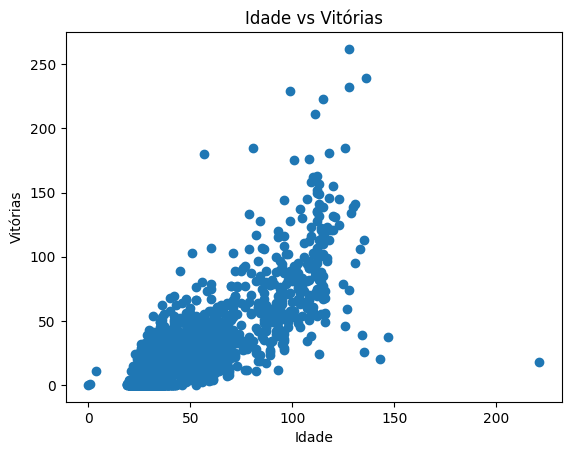

In [24]:
import matplotlib.pyplot as plt

plt.scatter(boxe_limpo['idade'], boxe_limpo['vitorias'])
plt.xlabel("Idade")
plt.ylabel("Vitórias")
plt.title("Idade vs Vitórias")
plt.show()

In [28]:
ko_por_postura = boxe_limpo.groupby("postura")["taxa_ko"].mean().sort_values(ascending=False)
ko_por_postura


postura
Southpaw    46.663483
Unknown     43.125490
Orthodox    36.619934
Name: taxa_ko, dtype: float64

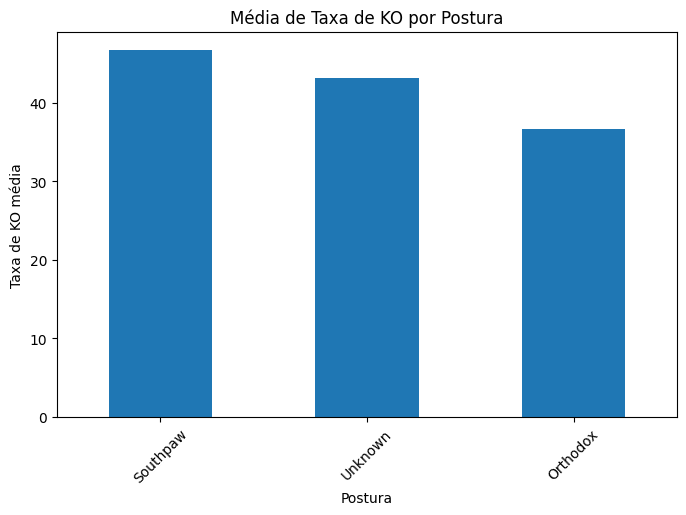

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ko_por_postura.plot(kind='bar')
plt.title("Média de Taxa de KO por Postura")
plt.xlabel("Postura")
plt.ylabel("Taxa de KO média")
plt.xticks(rotation=45)
plt.show()

**Relação entre Taxa de KO e Postura**

Analisei a média da taxa de nocaute (KO rate) para cada tipo de postura dos lutadores. O objetivo foi identificar se existe alguma relação entre o estilo de base (Orthodox, Southpaw etc.) e o poder de nocaute dos atletas.

Resultados

**Southpaw (canhoto): 46.66%**

**Orthodox (destro): 36.61%**

Unknown: 43.12% (não considerado por falta de informação confiável)

Conclusão

Os lutadores com postura Southpaw apresentaram a maior taxa média de KO no conjunto de dados. Isso faz sentido no contexto do boxe, já que lutadores canhotos são menos comuns e muitos adversários têm mais dificuldade em lidar com golpes vindos da esquerda.
Essa vantagem estratégica pode contribuir para uma taxa de KO maior.

A postura Orthodox, mais comum no boxe, apresentou a menor média de KO.

In [31]:
ko_por_pais = boxe_limpo.groupby('pais')['taxa_ko'].mean().sort_values(ascending=False)
ko_por_pais.head(10)

pais
Suriname       91.700000
Costa Rica     88.900000
Egypt          81.000000
Uruguay        80.000000
Algeria        75.000000
Mongolia       75.000000
New Zealand    72.450000
Saint Lucia    66.700000
Armenia        61.900000
Ghana          61.128571
Name: taxa_ko, dtype: float64

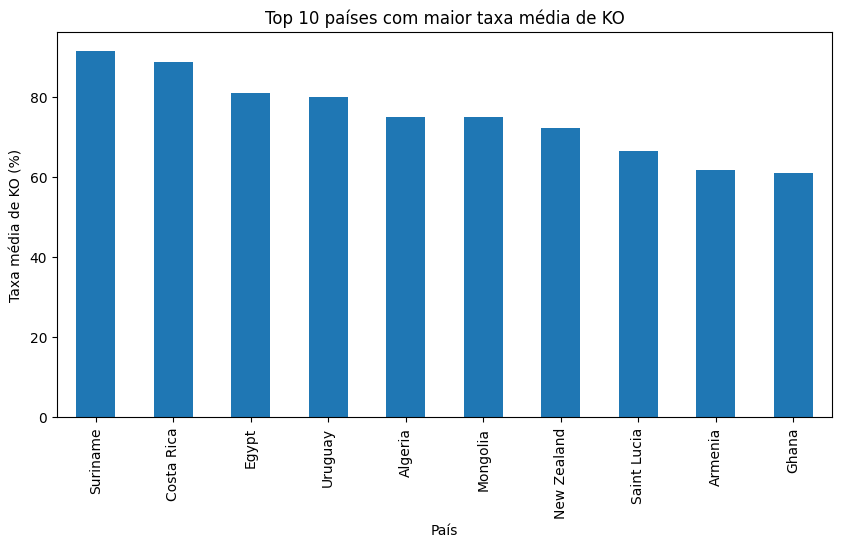

In [32]:
ko_por_pais.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 países com maior taxa média de KO")
plt.ylabel("Taxa média de KO (%)")
plt.xlabel("País")
plt.show()

**Taxa média de nocaute por páis**

Ao analisar, foi possível identificar quais nações possuem lutadores mais agressivos ou finalizadores ao longo da carreira.

Os resultados mostraram que alguns países menores ou com tradição menos conhecida no boxe apresentaram médias de **KO** bastante altas — possivelmente indicando estilos de luta mais ofensivos, seleções enviesadas ou competições regionais menos equilibradas.

Esse tipo de análise ajuda a perceber padrões geográficos e culturais no esporte.

📌 Conclusões do Projeto

A análise dos lutadores de boxe permitiu identificar vários padrões interessantes sobre idade, postura, taxa de nocaute e desempenho por país. Apesar de o dataset apresentar algumas limitações — como valores faltantes e possíveis inconsistências em algumas colunas — ainda assim foi possível extrair insights relevantes que enriquecem o estudo.

1. **Idade e Vitórias Estão Fortemente Relacionadas**

Observamos uma alta correlação positiva entre idade e número de vitórias. Isso não significa que lutadores mais velhos performam melhor por serem mais velhos, mas sim que:

Lutadores com mais idade geralmente têm mais anos de carreira.

Quanto maior o tempo no esporte, mais lutas e, portanto, maior tendência de acumular vitórias.

Isso mostra como métricas isoladas podem enganar, e por isso foi importante trabalhar com média e mediana para ter uma visão mais realista.

2. **Postura influencia a taxa de nocaute**

Ao analisar a média da taxa de KO por postura:

Southpaw (canhoto) apresentou a maior taxa média de nocaute, alinhado com o que vemos no boxe real — canhotos frequentemente trazem vantagem tática.

Orthodox teve taxa mais baixa.

A categoria Unknown foi mantida com cautela, apenas para não perder dados, mas interpretada com atenção.

3. **Países com Maior Taxa Média de KO**

Uma das análises mais interessantes foi encontrar os países com média mais alta de taxa de KO:

Apareceram países inesperados no topo, como Suriname, Costa Rica e Egito, o que reforça a diversidade do dataset.

Isso pode indicar academias locais muito agressivas, menor número de lutadores (média inflada) ou estilos regionais particulares.

Essa análise pode ser explorada futuramente correlacionando número de lutas por país ou criando clusters por estilo.

4. **Perfil Geral dos Lutadores**

A mediana de idade foi 37 anos — mais coerente para atletas com carreiras longas.

A média de KO ficou em torno de 37%, dentro do esperado para lutadores profissionais.

Os EUA aparecem com o maior número absoluto de lutadores e vitórias, o que reflete a força do país no cenário do boxe.

**Considerações Finais**

Mesmo com limitações no dataset, o projeto cumpriu seu objetivo:
✔ Explorar dados reais de boxe
✔ Aplicar técnicas de limpeza, transformação e análise com Pandas
✔ Criar métricas e visualizações relevantes
✔ Desenvolver um raciocínio analítico baseado em evidências
✔ Apresentar insights que fazem sentido dentro do contexto esportivo